In [1]:
%matplotlib notebook

In [2]:
from optimize_simple_network_utils import *

In [11]:
dt = 1.  # ms
sampling_rate = 1000. / dt
duration = 4000.  # ms
target_mean_rate = 10. # Hz
gamma_mod_freq = 70. # Hz
theta_mod_freq = 7. # Hz
# theta_target_envelope = 5.  # Hz
theta_target_envelope = 0.  # Hz
# gamma_target_envelope = 10.  # Hz
gamma_target_envelope = 0.  # Hz
filter_band_dict = {'Gamma': [50., 80.], 'Theta': [4., 10.]}  # Hz
sos_dict = {}
filter_order = 15

In [12]:
t = np.arange(0., duration, dt)

In [13]:
rate = target_mean_rate + theta_target_envelope * np.cos(2. * np.pi * t * theta_mod_freq / 1000.) + gamma_target_envelope * np.cos(2. * np.pi * t * gamma_mod_freq / 1000.)

<IPython.core.display.Javascript object>


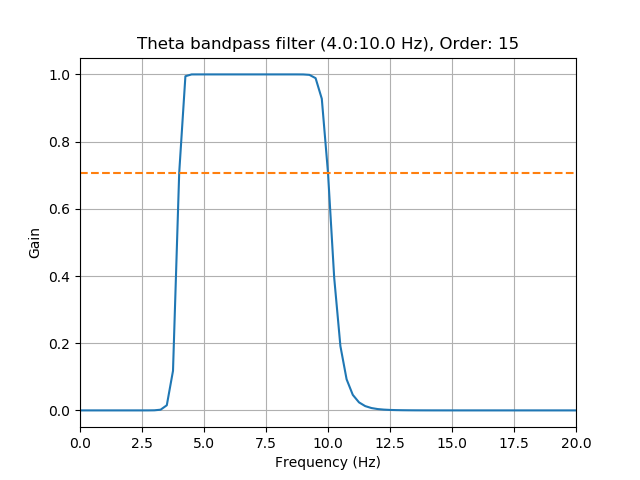

<IPython.core.display.Javascript object>


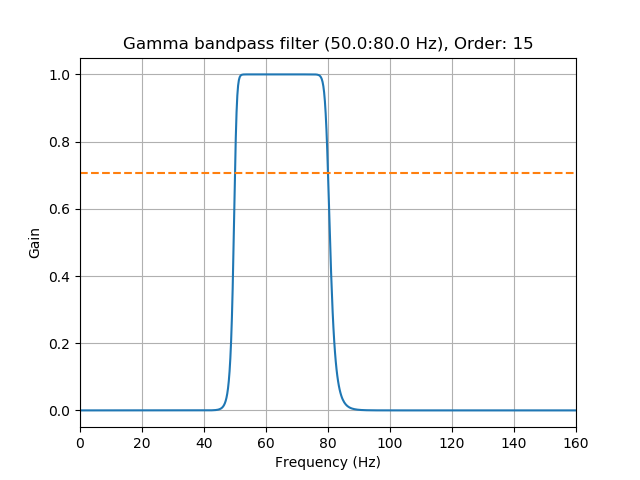

In [14]:
for filter_label, filter_band in filter_band_dict.iteritems():
    sos_dict[filter_label] = get_butter_bandpass_filter(filter_band, sampling_rate, order=filter_order, filter_label=filter_label, plot=True)

<IPython.core.display.Javascript object>


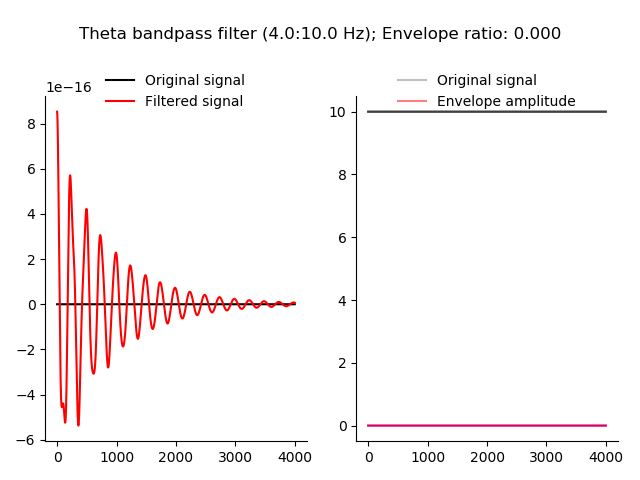

<IPython.core.display.Javascript object>


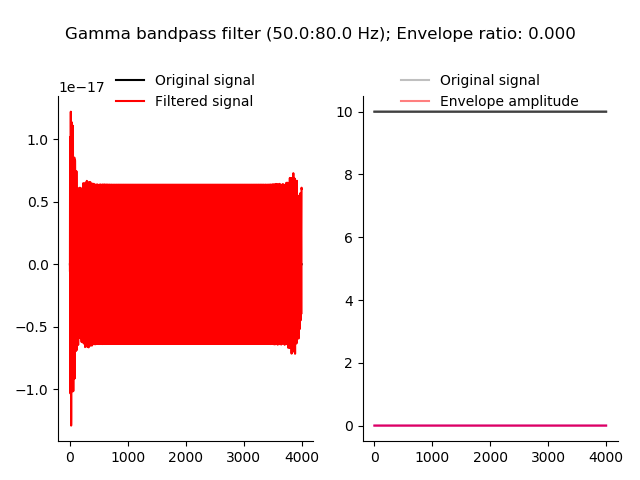

In [15]:
filtered_signal_dict, envelope_dict = {}, {}
for filter_label in filter_band_dict:
    filtered_signal_dict[filter_label], envelope_dict[filter_label] = \
    get_bandpass_filtered_signal_and_envelope(rate, t, sos_dict[filter_label], filter_band_dict[filter_label], 
                                              filter_label=filter_label, pad=True, plot=True)

In [16]:
local_random = random.Random()
local_random.seed(0)

In [19]:
num_cells = 200
spike_trains = []
binned_spike_count = []
for i in xrange(num_cells):
    this_spike_train = get_inhom_poisson_spike_times_by_thinning(rate, t, dt=dt, generator=local_random)
    spike_trains.append(this_spike_train)
    this_binned_spike_count = np.zeros_like(t)
    indexes = []
    ti = 0
    for this_spike in this_spike_train:
        i = np.where(t[ti:] >= this_spike)[0]
        if np.any(i):
            indexes.append(i[0])
    this_binned_spike_count[indexes] = 1.
    binned_spike_count.append(this_binned_spike_count)
mean_rate_from_spike_count = np.divide(np.mean(binned_spike_count, axis=0), dt/1000.)

<IPython.core.display.Javascript object>


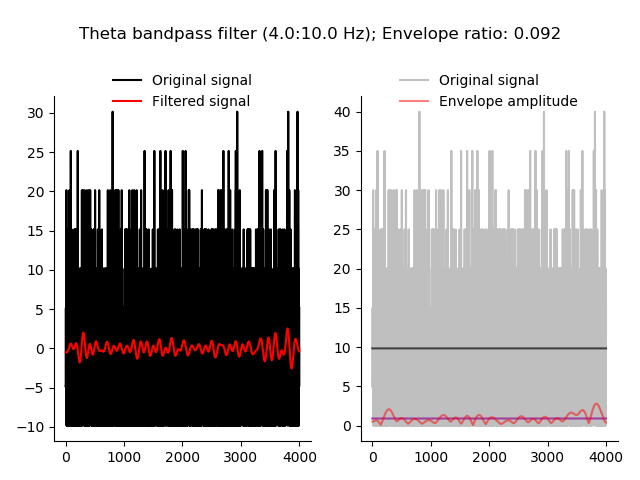

<IPython.core.display.Javascript object>


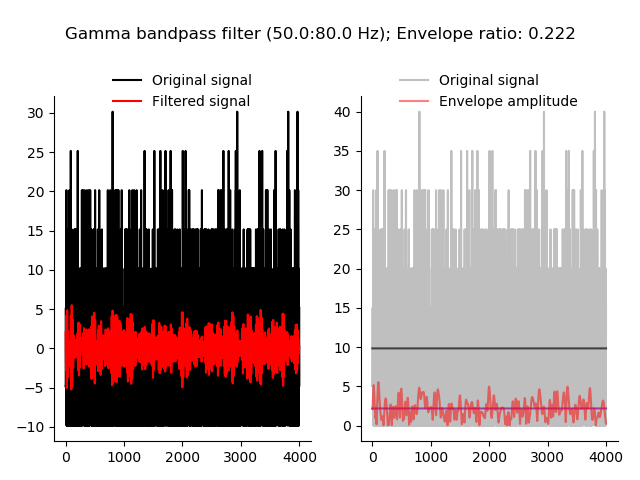

In [20]:
filtered_signal_dict, envelope_dict = {}, {}
for filter_label in filter_band_dict:
    filtered_signal_dict[filter_label], envelope_dict[filter_label] = \
    get_bandpass_filtered_signal_and_envelope(mean_rate_from_spike_count, t, sos_dict[filter_label], filter_band_dict[filter_label], 
                                              filter_label=filter_label, pad=True, plot=True)